In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
data=pd.read_excel('tv radio paper sales.xlsx')

In [6]:
data.head()

,TV,radio,newspaper,sales
0,NaN,NaN,NaN,NaN
1,230.1,37.8,69.2,22.1
2,NaN,NaN,NaN,NaN
3,44.5,39.3,45.1,10.4
4,NaN,NaN,NaN,NaN


In [11]:
data1=data.dropna(axis=0)
data1.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
3,44.5,39.3,45.1,10.4
5,17.2,45.9,69.3,9.3
7,151.5,41.3,58.5,18.5
9,180.8,10.8,58.4,12.9


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 399
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [15]:
data1.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\dhirendra\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


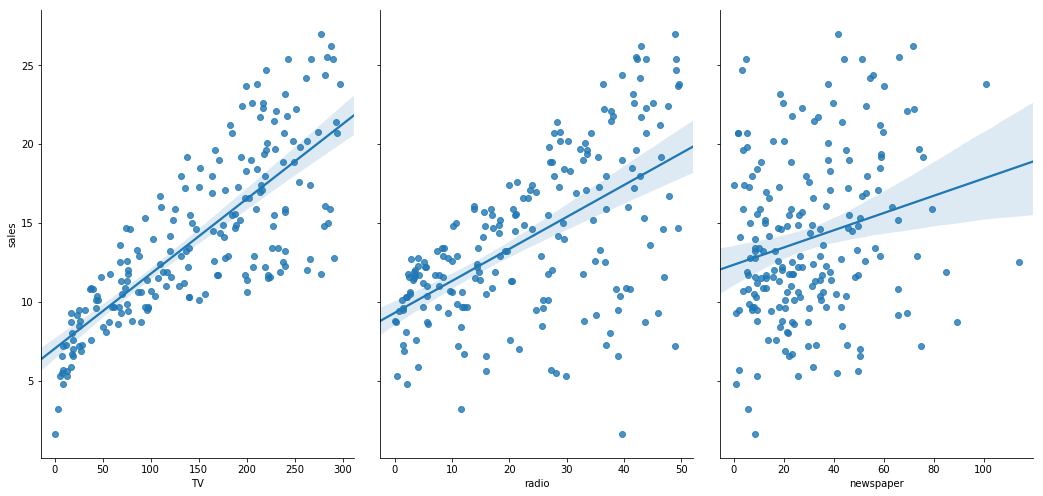

In [18]:
sns.pairplot(data,x_vars=['TV','radio','newspaper',],y_vars='sales',size=7,aspect=.7
             ,kind='reg')

In [33]:
x =data1.drop(['sales'],axis=1)

In [34]:
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
3,44.5,39.3,45.1
5,17.2,45.9,69.3
7,151.5,41.3,58.5
9,180.8,10.8,58.4


In [37]:
y=data1.drop(['TV','radio','newspaper'],axis=1)

In [38]:
y.head()

,sales
1,22.1
3,10.4
5,9.3
7,18.5
9,12.9


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


In [43]:
lr=LinearRegression()


In [44]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print(lr.intercept_)
print(lr.coef_)

[3.1261491]
[[ 0.04551014  0.18553154 -0.00428468]]


In [50]:
zip(['TV', 'Radio', 'Newspaper'], lr.coef_)

In [51]:
y_pred=lr.predict(x_test)

In [57]:
from sklearn import metrics

In [58]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4373912720419213
